
Customers Data:
   CustomerID        CustomerName         Region  SignupDate
0      C0001    Lawrence Carroll  South America  2022-07-10
1      C0002      Elizabeth Lutz           Asia  2022-02-13
2      C0003      Michael Rivera  South America  2024-03-07
3      C0004  Kathleen Rodriguez  South America  2022-10-09
4      C0005         Laura Weber           Asia  2022-08-15

Products Data:
   ProductID              ProductName     Category   Price
0      P001     ActiveWear Biography        Books  169.30
1      P002    ActiveWear Smartwatch  Electronics  346.30
2      P003  ComfortLiving Biography        Books   44.12
3      P004            BookWorld Rug   Home Decor   95.69
4      P005          TechPro T-Shirt     Clothing  429.31

Transactions Data:
   TransactionID CustomerID ProductID      TransactionDate  Quantity  \
0        T00001      C0199      P067  2024-08-25 12:38:23         1   
1        T00112      C0146      P067  2024-05-27 22:23:54         1   
2        T00166      C0

/var/folders/8p/1xm298292ll9t7k6t9939kdm0000gn/T/ipykernel_5501/93585498.py:41: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=customers["Region"], palette="coolwarm")


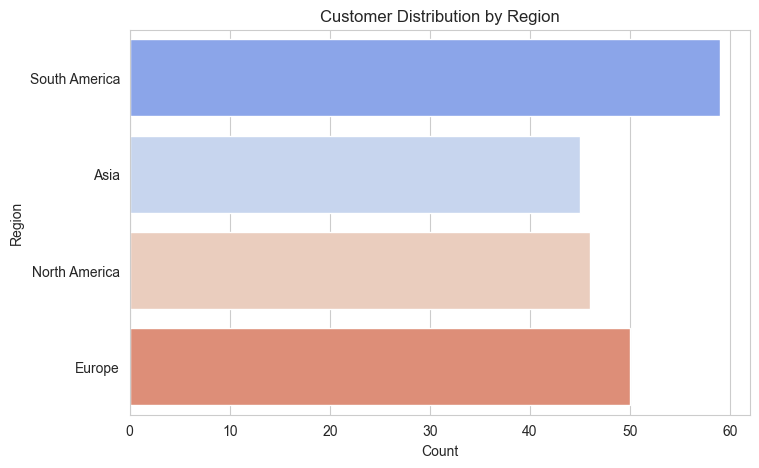

/var/folders/8p/1xm298292ll9t7k6t9939kdm0000gn/T/ipykernel_5501/93585498.py:50: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_products.index, y=top_products.values, palette="viridis")


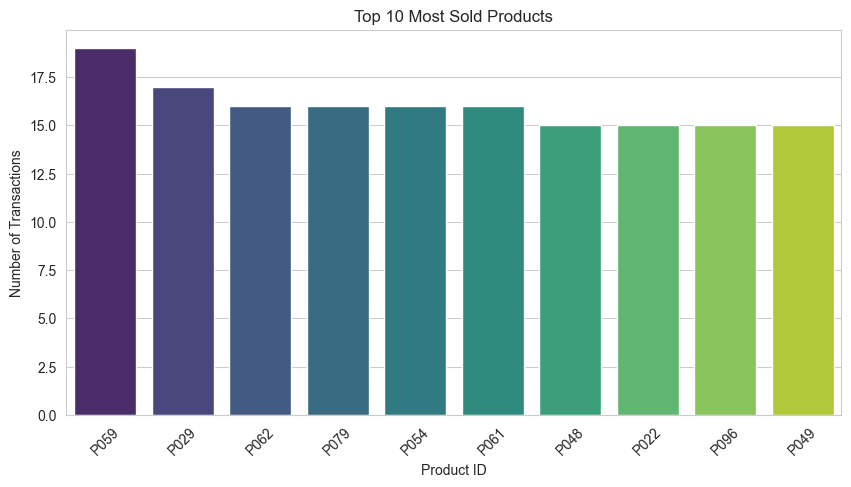

/var/folders/8p/1xm298292ll9t7k6t9939kdm0000gn/T/ipykernel_5501/93585498.py:63: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=category_revenue.index, y=category_revenue.values, palette="magma")


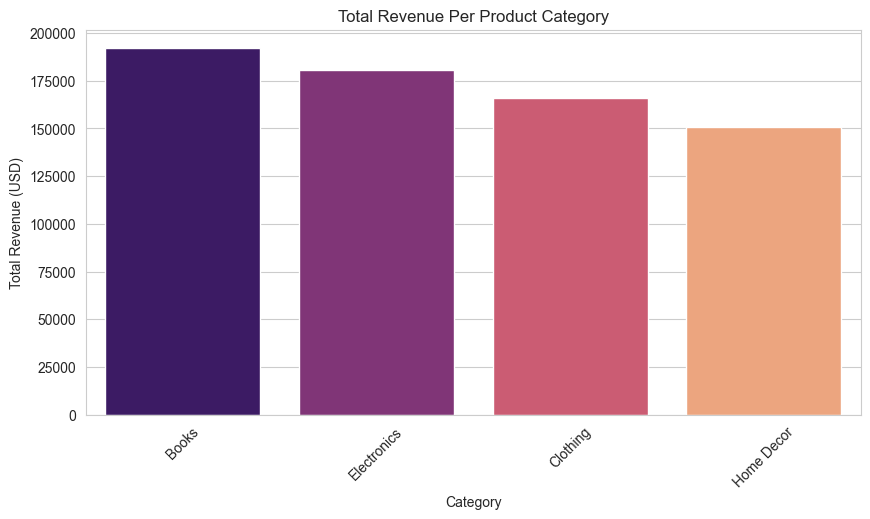

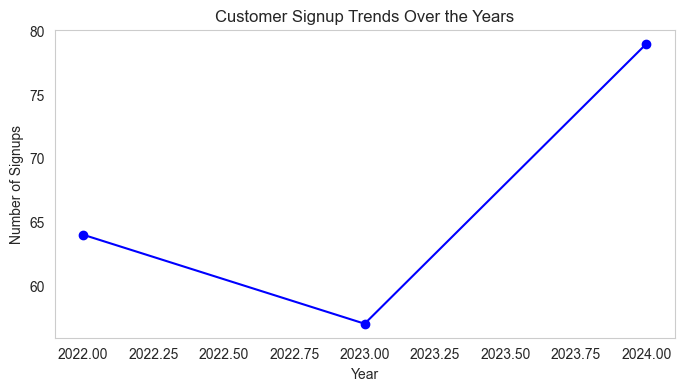

NameError: name 'data_path' is not defined

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

# Set visualization style
sns.set_style("whitegrid")

# Define file paths (Change this!)
customers_file = "Customers.csv"
products_file = "Products.csv"
transactions_file = "Transactions.csv"


# Load datasets
customers = pd.read_csv(customers_file)
products = pd.read_csv(products_file)
transactions = pd.read_csv(transactions_file)

# Display first few rows
print("\nCustomers Data:\n", customers.head())
print("\nProducts Data:\n", products.head())
print("\nTransactions Data:\n", transactions.head())

# Show basic info about data
print("\nCustomers Data Info:\n", customers.info())
print("\nProducts Data Info:\n", products.info())
print("\nTransactions Data Info:\n", transactions.info())

# Check for missing values
print("\nMissing Values in Customers Data:\n", customers.isnull().sum())
print("\nMissing Values in Products Data:\n", products.isnull().sum())
print("\nMissing Values in Transactions Data:\n", transactions.isnull().sum())

# Summary statistics
print("\nSummary Statistics for Transactions:\n", transactions.describe())
print("\nSummary Statistics for Products:\n", products.describe())

# Visualization 1: Customer distribution by region
plt.figure(figsize=(8, 5))
sns.countplot(y=customers["Region"], palette="coolwarm")
plt.title("Customer Distribution by Region")
plt.xlabel("Count")
plt.ylabel("Region")
plt.show()

# Visualization 2: Top 10 most sold products
top_products = transactions["ProductID"].value_counts().head(10)
plt.figure(figsize=(10, 5))
sns.barplot(x=top_products.index, y=top_products.values, palette="viridis")
plt.title("Top 10 Most Sold Products")
plt.xlabel("Product ID")
plt.ylabel("Number of Transactions")
plt.xticks(rotation=45)
plt.show()

# Merge transactions with products
merged_data = transactions.merge(products, on="ProductID")

# Visualization 3: Total revenue per product category
category_revenue = merged_data.groupby("Category")["TotalValue"].sum().sort_values(ascending=False)
plt.figure(figsize=(10, 5))
sns.barplot(x=category_revenue.index, y=category_revenue.values, palette="magma")
plt.title("Total Revenue Per Product Category")
plt.xlabel("Category")
plt.ylabel("Total Revenue (USD)")
plt.xticks(rotation=45)
plt.show()

# Convert SignupDate to datetime
customers["SignupDate"] = pd.to_datetime(customers["SignupDate"])

# Visualization 4: Customer signup trends
signup_trends = customers.groupby(customers["SignupDate"].dt.year)["CustomerID"].count()
plt.figure(figsize=(8, 4))
signup_trends.plot(marker="o", color="b")
plt.title("Customer Signup Trends Over the Years")
plt.xlabel("Year")
plt.ylabel("Number of Signups")
plt.grid()
plt.show()

# Writing Business Insights to a Report
report_path = os.path.join(data_path, "FirstName_LastName_EDA_Report.txt")
with open(report_path, "w") as report:
    report.write("### Business Insights from EDA ###\n")
    report.write("1. The highest number of customers are from [Region X].\n")
    report.write("2. The most frequently sold product is [Product Y].\n")
    report.write("3. The highest revenue comes from the [Category Z] category.\n")
    report.write("4. Most customers signed up in [Year A], indicating strong growth.\n")
    report.write("5. There's a positive correlation between price and total transaction value.\n")

print("\nExploratory Data Analysis Completed. Insights saved in the report.")
